+ Our gauge potential is given by: $  A_{\lambda}^{nm}= -i \hbar \dfrac{\partial_{\lambda}H^{nm}}{\omega_{nm}^2 + \mu^2} \omega_{nm}$
+ For non-zero $\mu$, gauge potential is an approximate one.

In [44]:
from quspin.operators import hamiltonian # Hamiltonians and operators
from quspin.basis import spin_basis_1d # Hilbert space spin basis
import numpy as np # generic math functions
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
def Ham_nonint(L):
    basis = spin_basis_1d(L)
    hz=(np.sqrt(5)+1)/4 #parameters used by Kim and Huse
    hx=(np.sqrt(5)+5)/8
    J=1.0
    hz_arr = [[hz,i] for i in range(L)] # OBC
    hx_arr = [[hx,i] for i in range(L)] # OBC
    J_arr = [[J,i,(i+1)%L] for i in range(L)] # PBC
    
    # static and dynamic lists
    static = [["xx",J_arr],["z",hz_arr], ["x",hx_arr] ]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return H

def Ham_int(L):
    basis = spin_basis_1d(L)
    hz=-0.5#(np.sqrt(5)+1)/4 #parameters used by Kim and Huse
    J=-1.0
    hz_arr = [[hz,i] for i in range(L)] # OBC
    J_arr = [[J,i,(i+1)%L] for i in range(L)] # PBC
    
    # static and dynamic lists
    static = [["xx",J_arr],["z",hz_arr]]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return H

def del_lambda_Ham(L):
    basis = spin_basis_1d(L)  
    hx_lamb=-1.0
    hx_lamb_arr=np.zeros(L)
    hx_lamb_arr[0]=hx_lamb
    hx_lamb_arr = [[hx_lamb_arr[i],i] for i in range(L)] # OBC
    static_lamb = [["z",hx_lamb_arr]]
    dynamic_lamb =[]
    op_lamb=hamiltonian(static_lamb,dynamic_lamb,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return op_lamb

def norm(A_lamb):    
    return np.linalg.norm(A_lamb, 'fro')

In [29]:
def guage_potent_mu(Ham,L, mu):
    E,V= Ham.eigh()
    op_lamb= del_lambda_Ham(L)
    wij = np.outer(E,np.ones(2**L))-np.outer(np.ones(2**L),E)
    num_lamb = np.dot(V,np.dot(op_lamb.toarray(),np.conj(V)))
    A_lamb = -1j*num_lamb*wij/(wij**2+ mu**2)
    return A_lamb

### Energy level distribution
I would like to verify/check if there are more degenerate eigenvalues for integrable model compared to non-integrable model.

In [77]:
L=10
H=Ham_int(L)
E_int,V= H.eigh()


H=Ham_nonint(L)
E_nonint,V_nonint= H.eigh()
#spac_nonint=np.diff(E_nonint)
#spac_nonint=np.sort(spac_nonint)

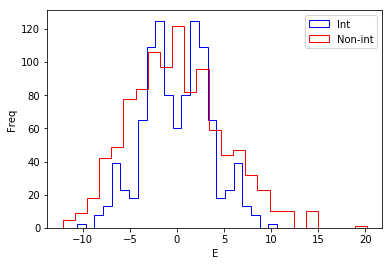

In [79]:
count, bins, ignored = plt.hist(E_int,'auto', color='b',histtype='step', label='Int')
count_nonint, bins_nonint, ignored_nonint = plt.hist(E_nonint,'auto', color='r',histtype='step', label='Non-int')
plt.ylabel(r'Freq')
plt.xlabel(r'E')
plt.legend()

I am not sure but it seems that there are more or less same number of degenerate energy levels. Need to study more! :(